In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd 
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [2]:
%matplotlib inline
sns.set_style(style = 'whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
  'Adelie': '#ff6602ff',
  'Gentoo': '#0f715ff',
  'Chinstrap': '#c65dc9ff'
}

In [3]:
preprocessed_penguins_df = palmerpenguins.load_penguins()
preprocessed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
processed_penguins_df = (
  preprocessed_penguins_df
  .dropna()
)

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [5]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

In [6]:
preprocessed_penguins_df.min(numeric_only=True) # type: ignore

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

In [7]:
processed_penguins_df.max(numeric_only=True)-preprocessed_penguins_df.min(numeric_only=True) # type: ignore

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

In [8]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [9]:
processed_penguins_df.mean(numeric_only=True)+processed_penguins_df.std(numeric_only= True)

bill_length_mm         49.461461
bill_depth_mm          19.134100
flipper_length_mm     214.982732
body_mass_g          5012.272859
year                 2008.854986
dtype: float64

In [10]:
max_quantile = processed_penguins_df.quantile(0.75,numeric_only=True)
min_quantile = processed_penguins_df.quantile(0.25, numeric_only=True)
print(max_quantile-min_quantile)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64


In [11]:
(
    processed_penguins_df
    .quantile(q=[0.75,0.5,0.25],numeric_only=True)
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
      iqr=lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


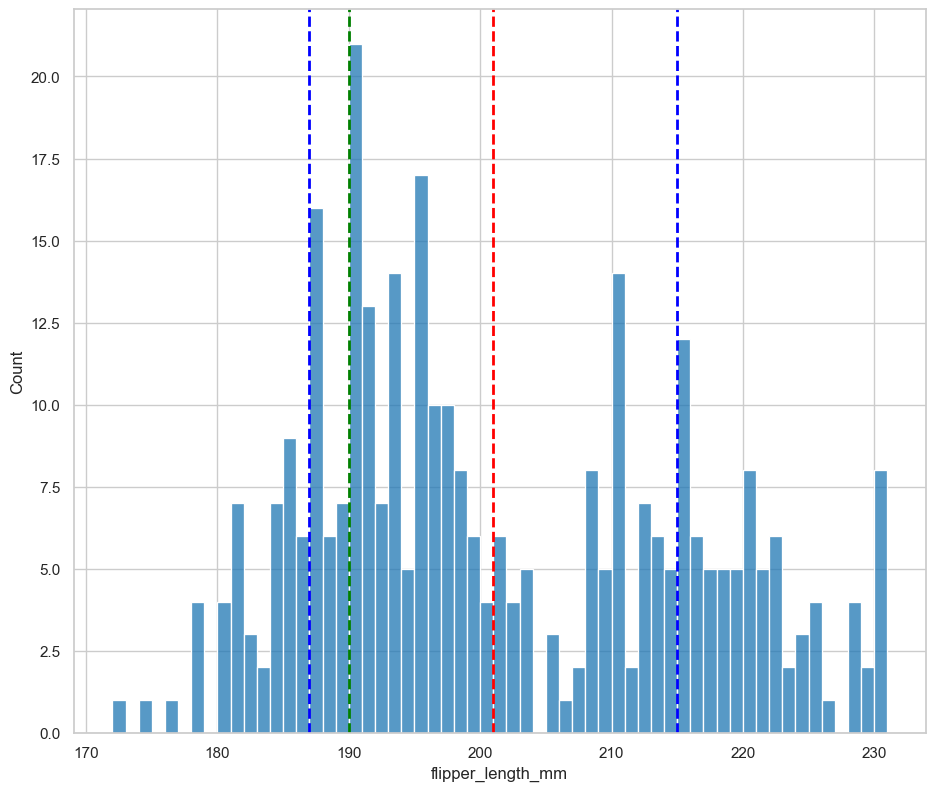

In [12]:
sns.histplot(
    binwidth=1,
    data=processed_penguins_df,
    x='flipper_length_mm',
)

penguin_flipper_length_mm = processed_penguins_df.flipper_length_mm


plt.axvline(
    x=penguin_flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=penguin_flipper_length_mm.std() + penguin_flipper_length_mm.mean(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=-penguin_flipper_length_mm.std() + penguin_flipper_length_mm.mean(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x = penguin_flipper_length_mm.mode().item(),
    color='green',
    linestyle='dashed',
    linewidth=2
)


plt.show()

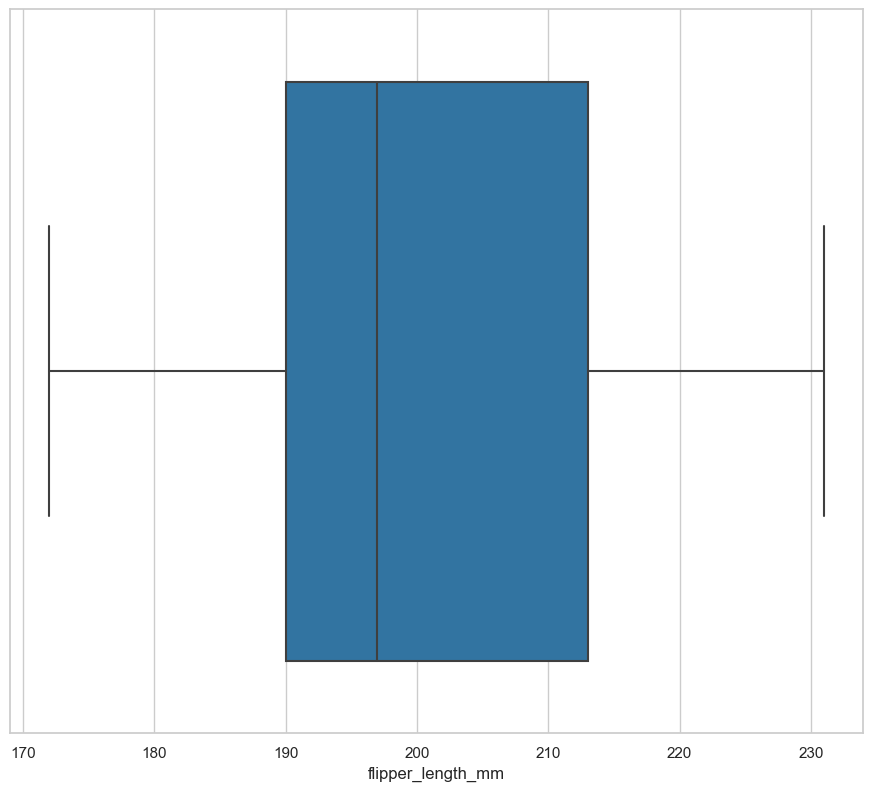

In [13]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

plt.show()

Utilizando empiricaldist

In [14]:
pmf_flipper_length_mm=empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

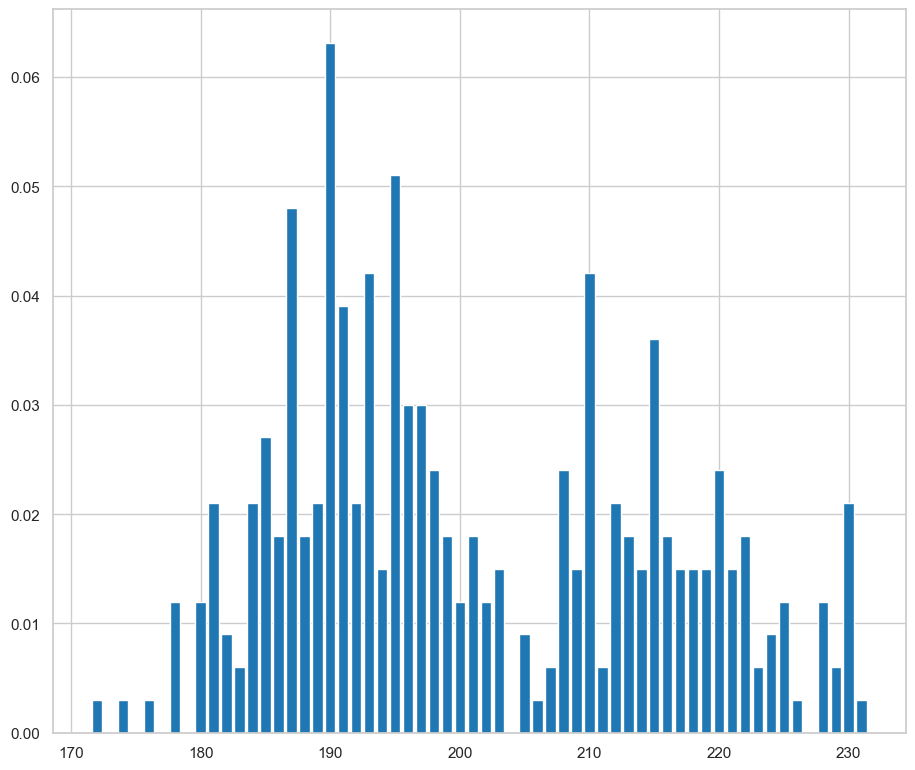

In [15]:
pmf_flipper_length_mm.bar()

In [16]:
pmf_flipper_length_mm(231)

0.003003003003003003

In [17]:
processed_penguins_df.flipper_length_mm.max()

231.0

Funciones empiricas de probabilidad acumulada (ECDFs)

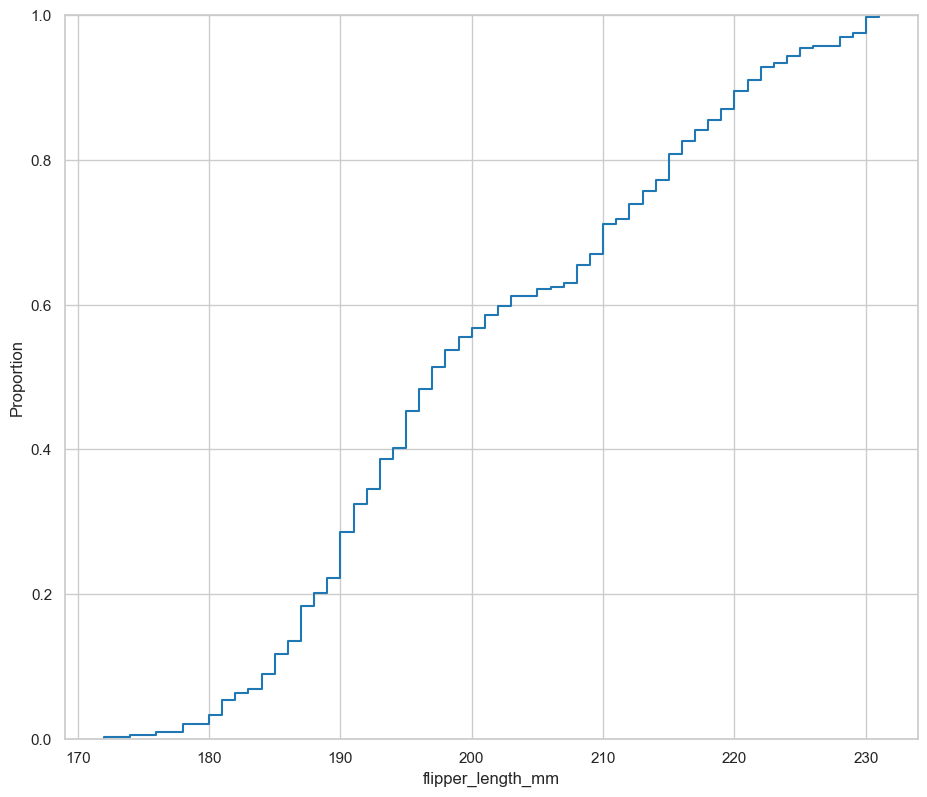

In [18]:
# Usando seaborn

sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)
plt.show()

In [19]:
# usando empiricaldist

cdf_flipper_legth_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

<AxesSubplot: >

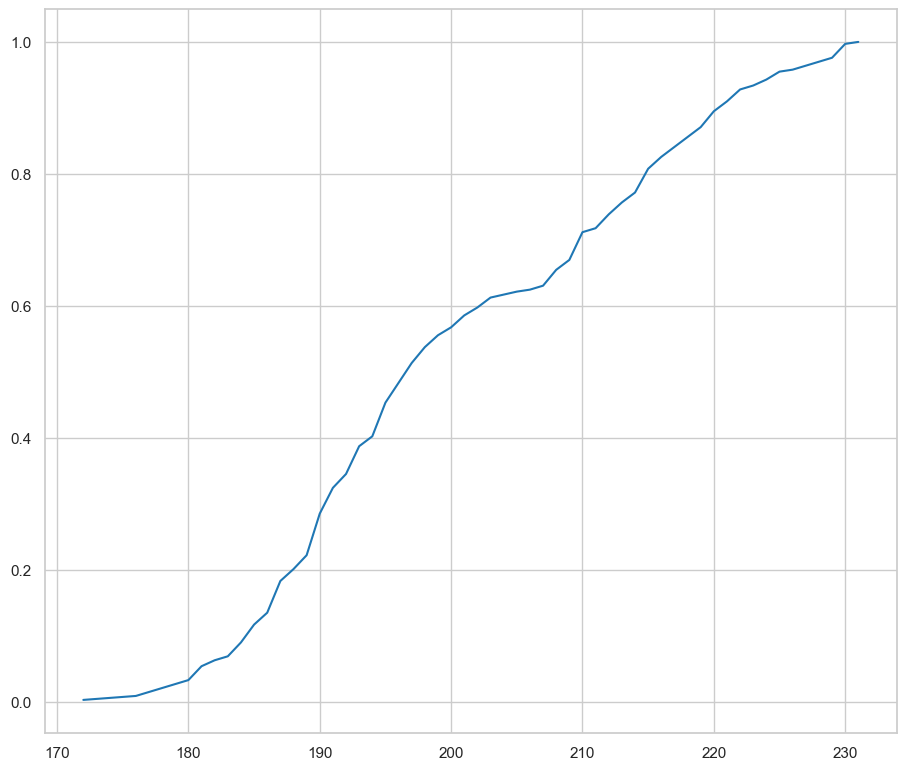

In [20]:
cdf_flipper_legth_mm.plot()



In [21]:
q=200
p=cdf_flipper_legth_mm(q)


print(q,p)

200 0.5675675675675675


Comprando distribuciones

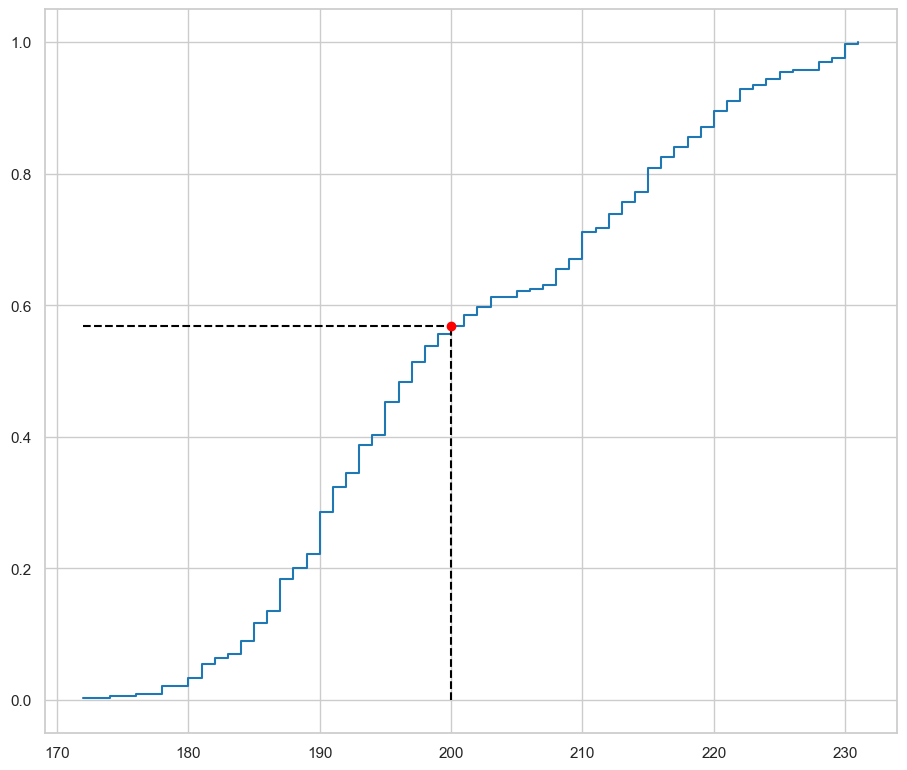

In [22]:
cdf_flipper_legth_mm.step()

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)


plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)


plt.plot(q,p,'ro')


Funciones de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

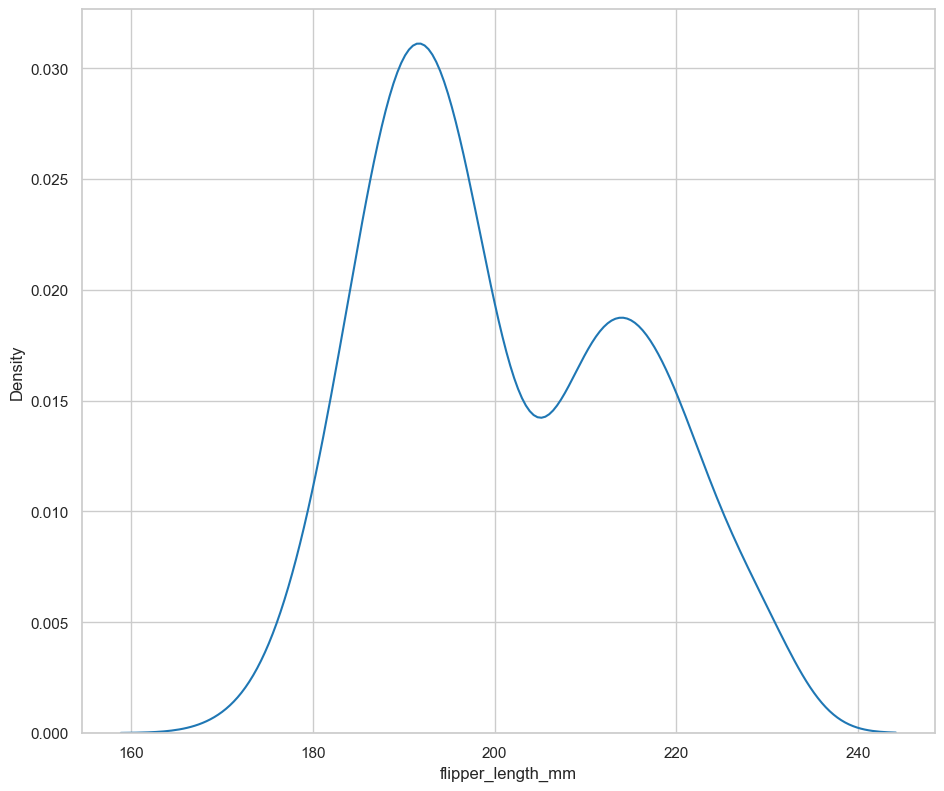

In [23]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
)

In [24]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot: >

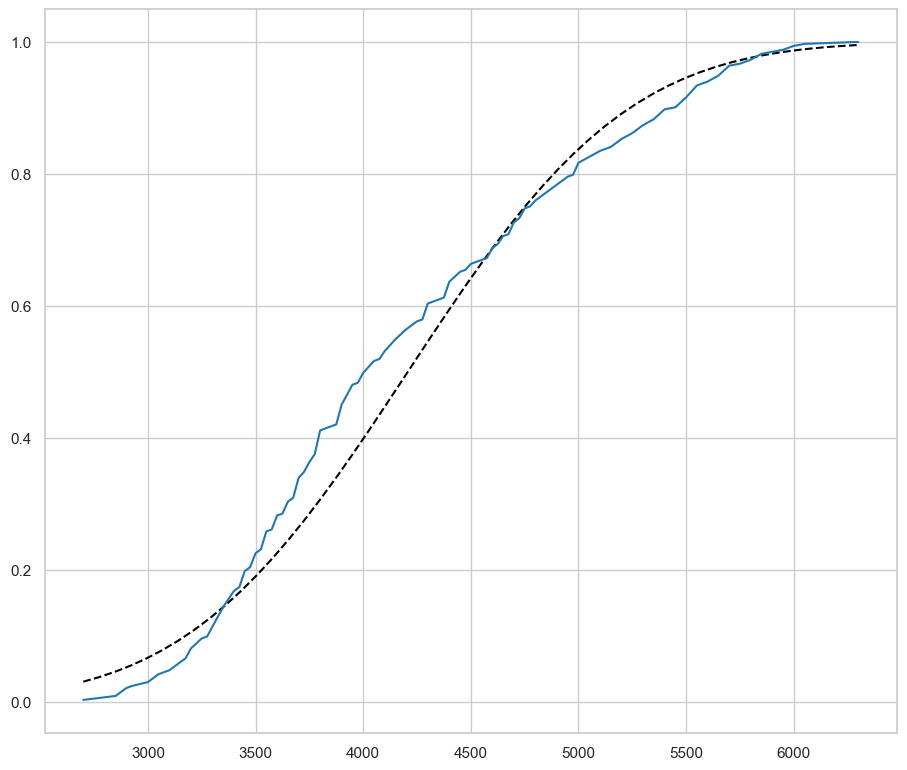

In [25]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)


plt.plot(xs,ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

[]

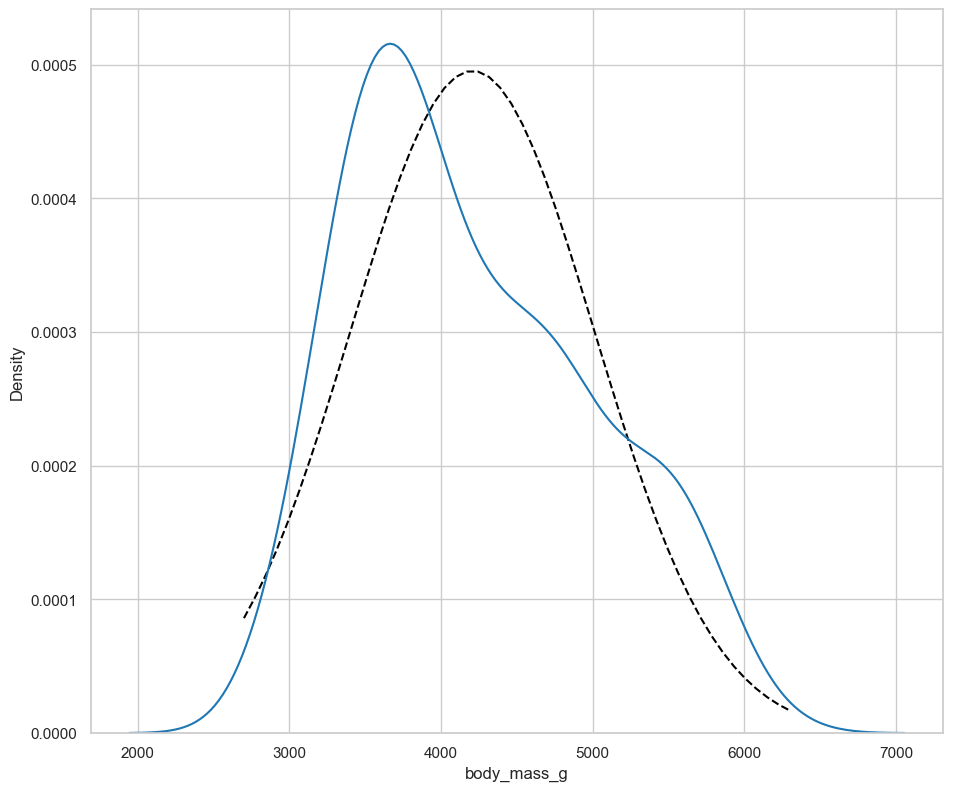

In [26]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)


plt.plot(xs,ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
).plot()

## Ley de los grande numero y teorema del limite central

Ley de los grandes numeros

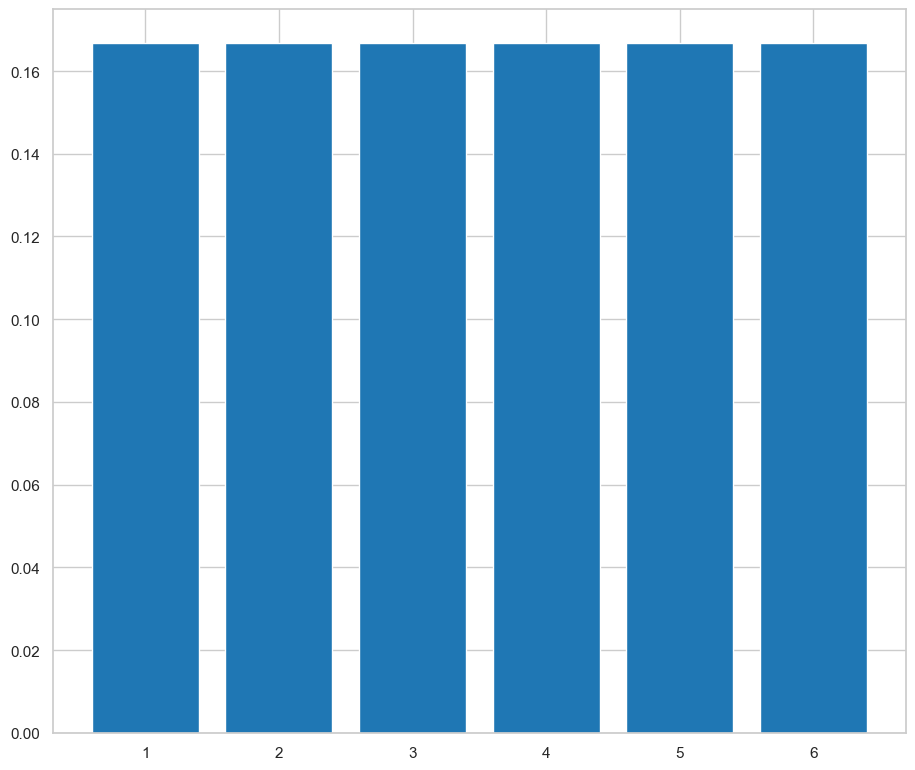

In [27]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

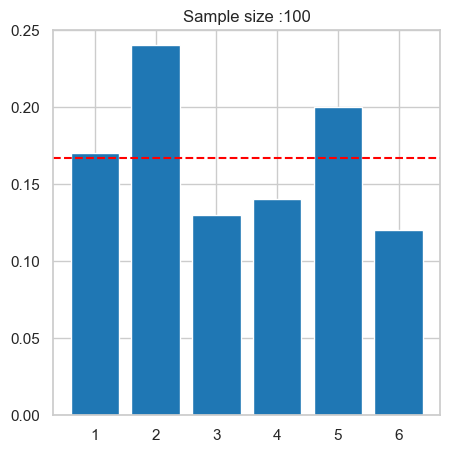

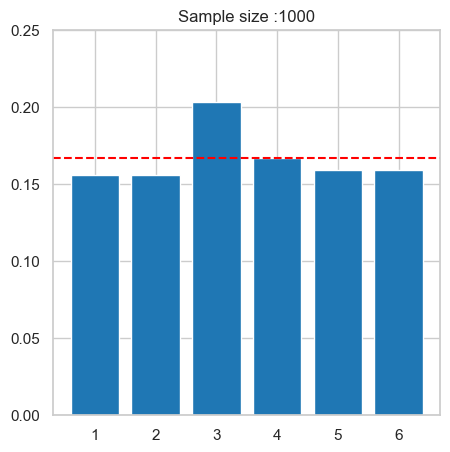

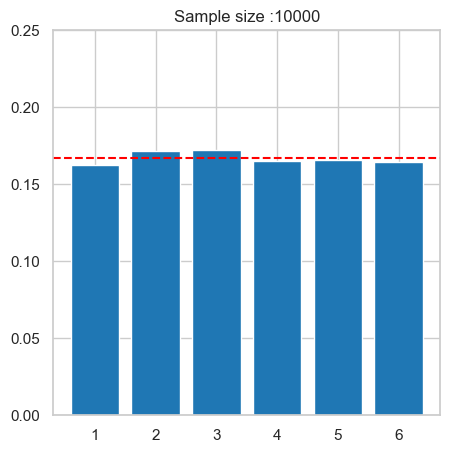

In [28]:
for sample_size in (1e2,1e3,1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf=empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim([0,0.25])
    plt.title(f'Sample size :{sample_size}')

Teorema de limite central

In [29]:
processed_penguins_df.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [30]:
sex_numeric = processed_penguins_df.sex.replace(['male','female'],[1,0])
sex_numeric

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int64

In [31]:
number_samples = 1000
sample_size=35

samples_df=pd.DataFrame()

np.random.seed(42)

for i in range(1,number_samples+1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name=f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_poplation_mean=samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is {male_poplation_mean*100:.4f}%")



C:\Users\ldanl\AppData\Local\Temp\ipykernel_22340\701171101.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
C:\Users\ldanl\AppData\Local\Temp\ipykernel_22340\701171101.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
C:\Users\ldanl\AppData\Local\Temp\ipykernel_22340\701171101.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Estimated percentage of male penguins in population is 50.1829%


C:\Users\ldanl\AppData\Local\Temp\ipykernel_22340\701171101.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
C:\Users\ldanl\AppData\Local\Temp\ipykernel_22340\701171101.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
C:\Users\ldanl\AppData\Local\Temp\ipykernel_22340\701171101.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

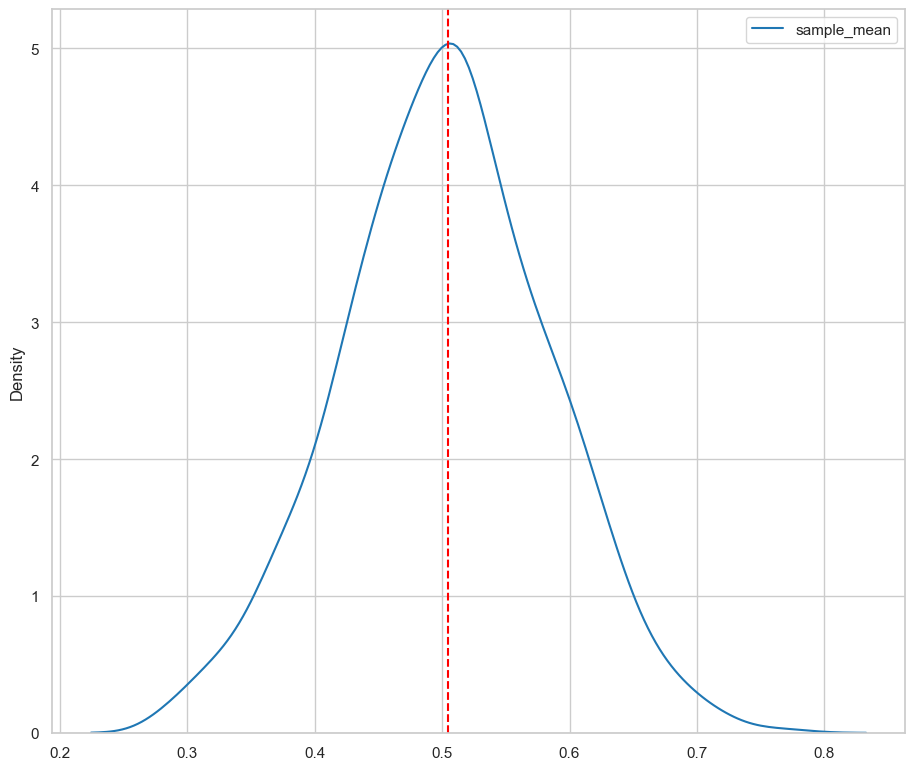

In [32]:
sample_means_binomial = pd.DataFrame(samples_df.mean(),columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(),color='red',linestyle='dashed')
plt.show()

### Estableciendo relaciones: Graficas de puntos

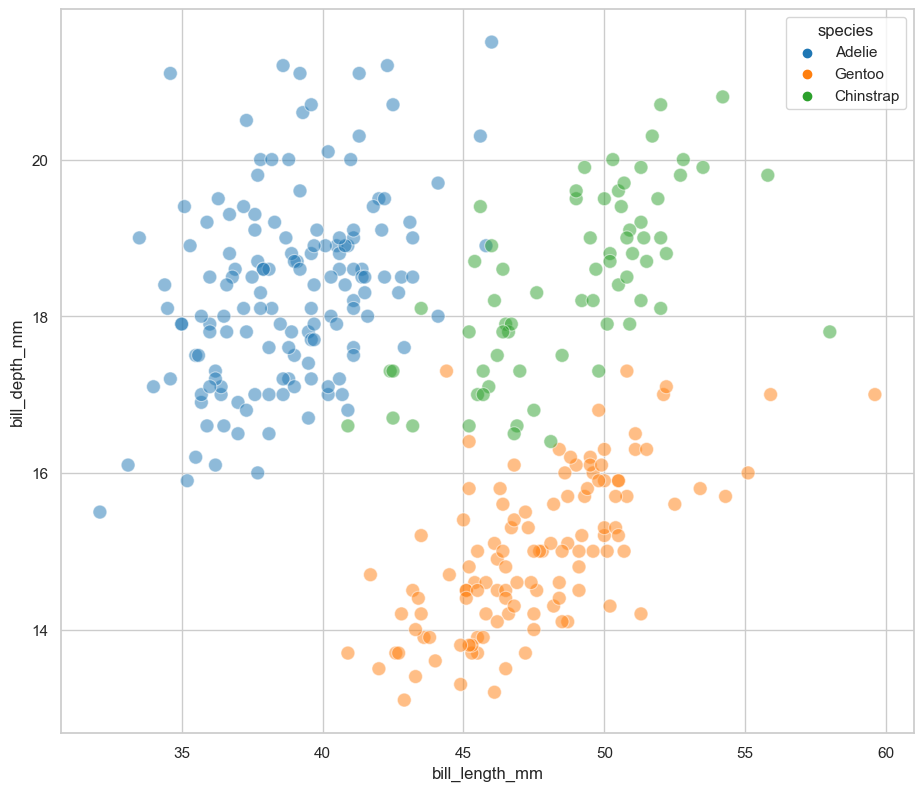

In [33]:
sns.scatterplot(
    data= processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=100,
    hue='species'
)
plt.show()

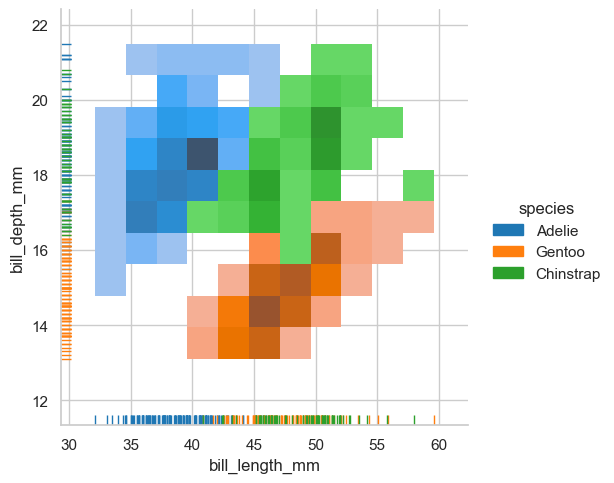

In [34]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    hue='species'
)

C:\Users\ldanl\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'ruge'
  cset = contour_func(


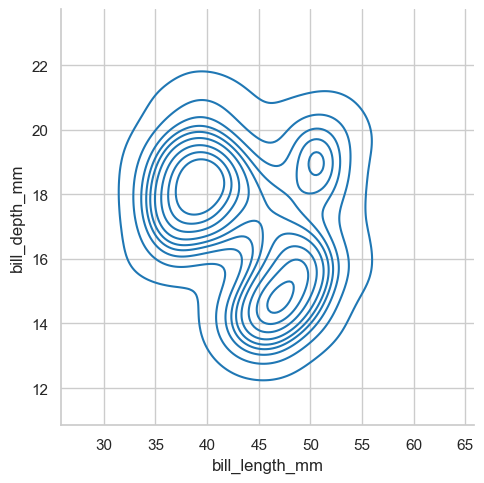

In [35]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    ruge=True,
    kind='kde'

)

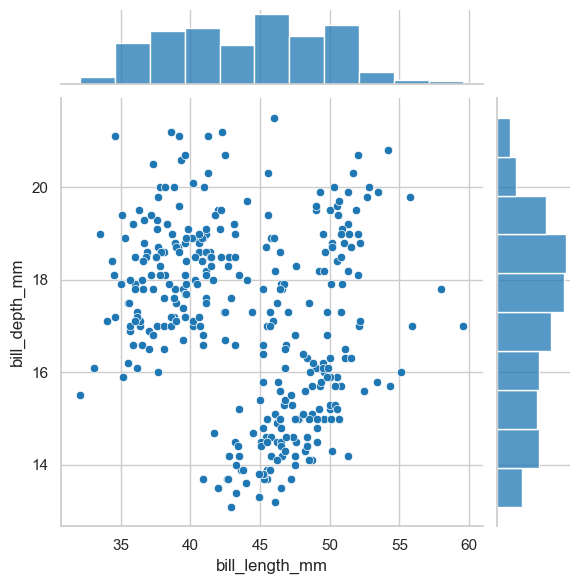

In [36]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

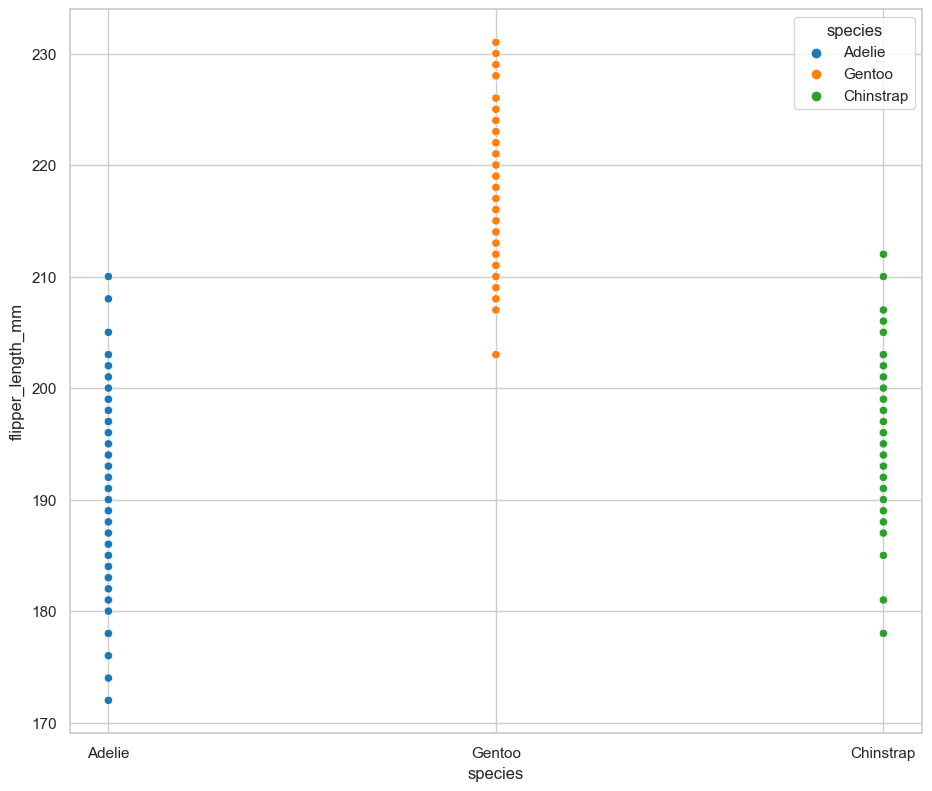

In [37]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)


<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

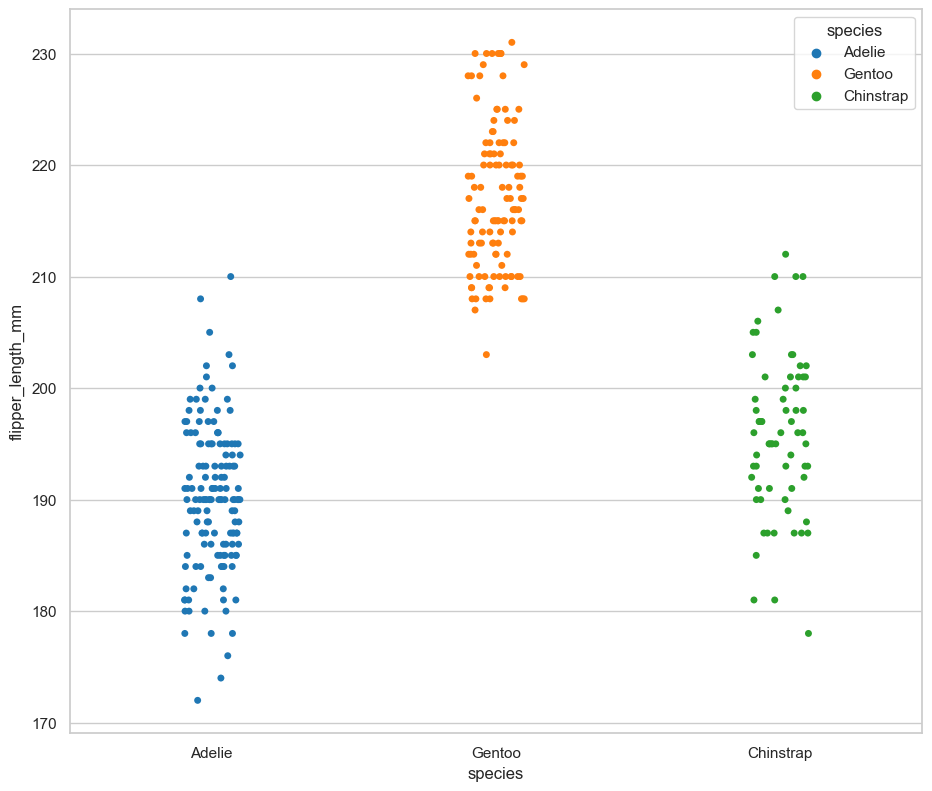

In [38]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

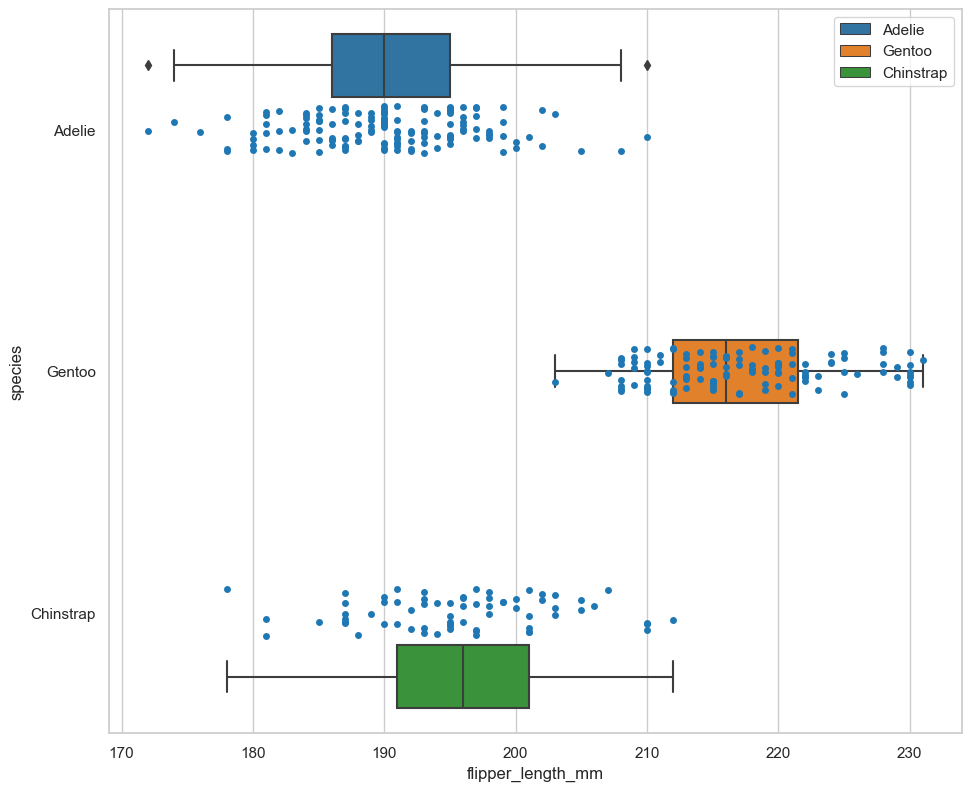

In [39]:
ax=sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    hue='species'
)

ax= sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
)

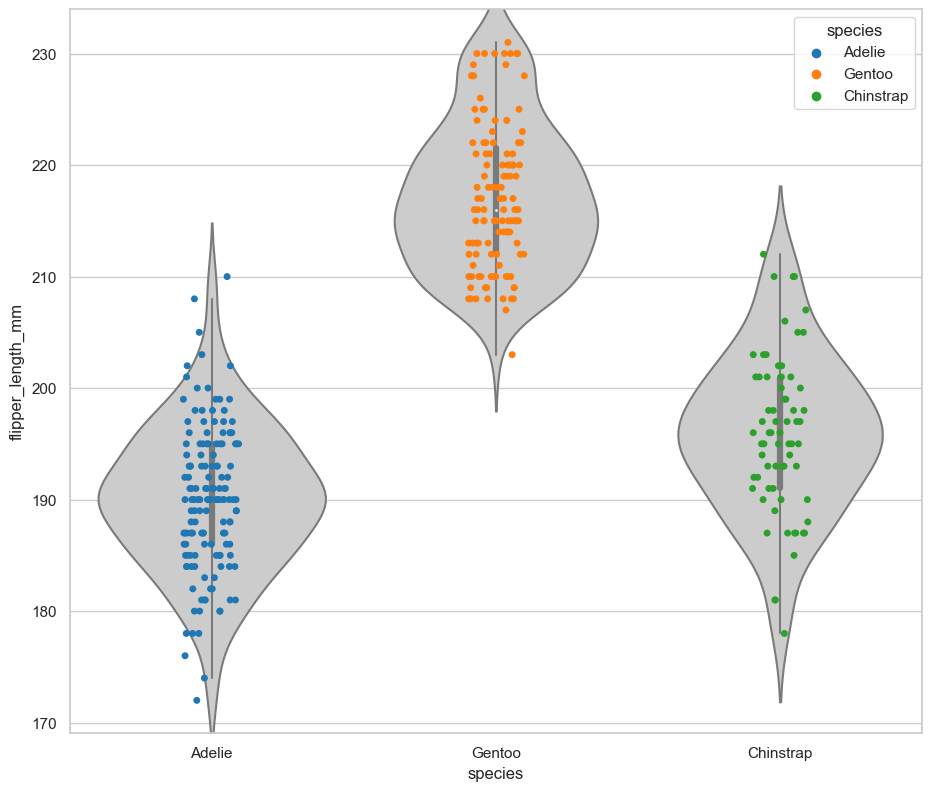

In [40]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)


ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

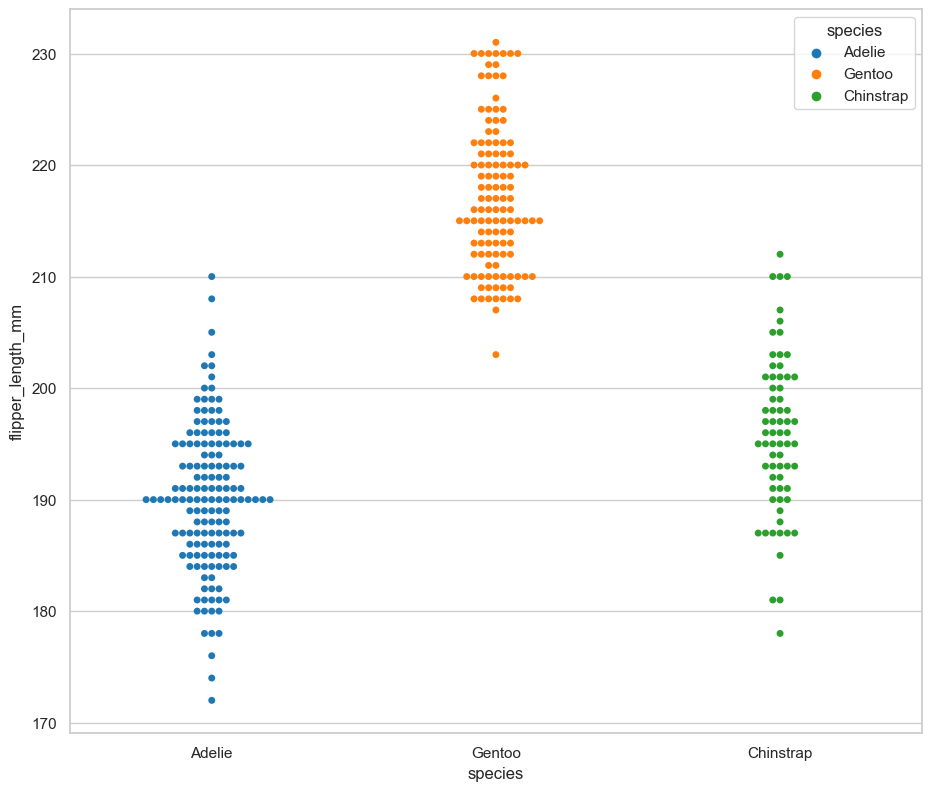

In [41]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

plt.show()

# Estableciendo Relaciones : matrices de correlacion

In [42]:
processed_penguins_df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


C:\Users\ldanl\AppData\Local\Temp\ipykernel_22340\901511194.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


<AxesSubplot: >

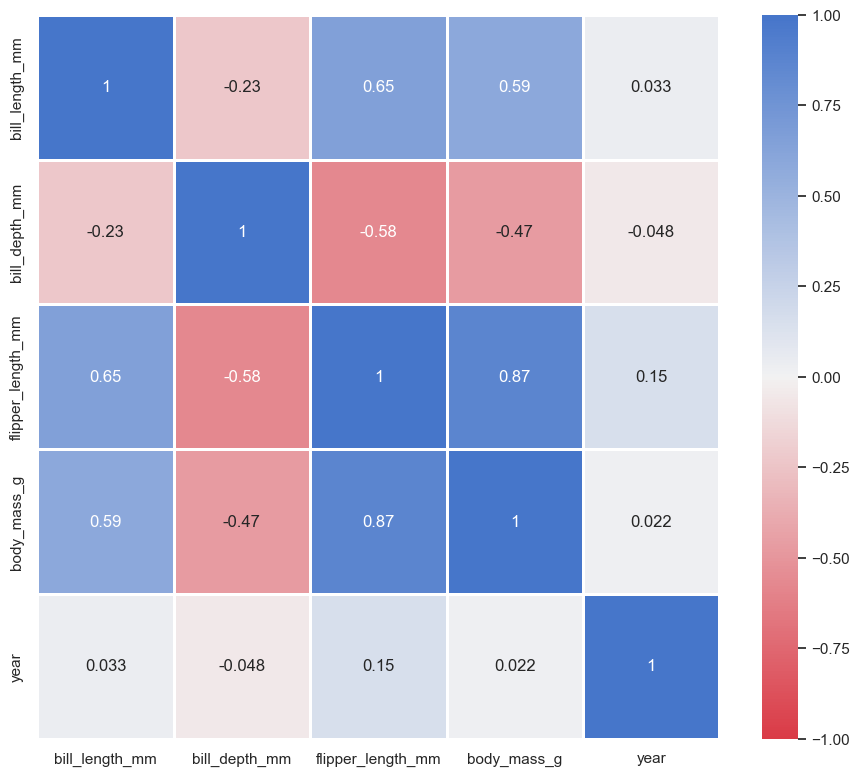

In [43]:
sns.heatmap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(10,255, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=1,
    annot=True
)

In [44]:
sex_map= {'male': 1, 'female': 0}

processed_penguins_df['numeric_sex'] = processed_penguins_df['sex'].apply(lambda x: sex_map[x])

processed_penguins_df

C:\Users\ldanl\AppData\Local\Temp\ipykernel_22340\1848688999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_penguins_df['numeric_sex'] = processed_penguins_df['sex'].apply(lambda x: sex_map[x])


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1


C:\Users\ldanl\AppData\Local\Temp\ipykernel_22340\218361944.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


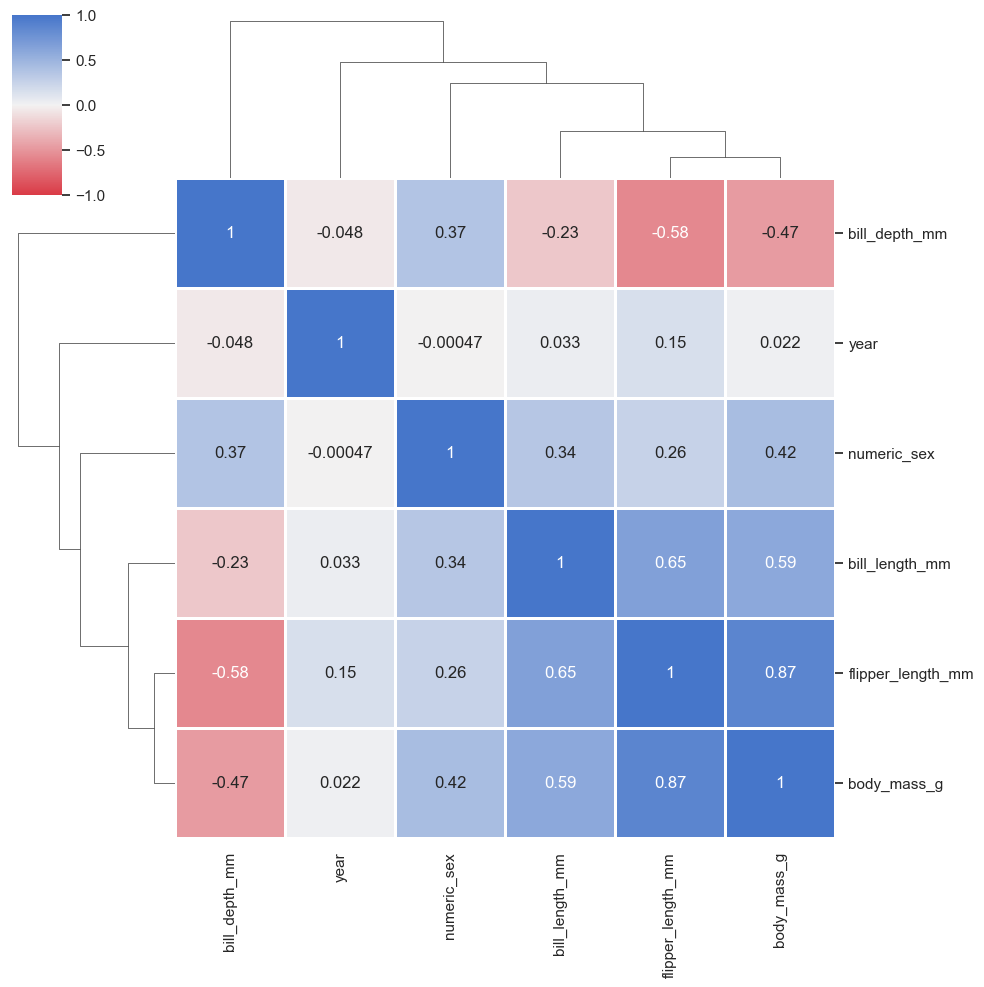

In [45]:
sns.clustermap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(10,255, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=1,
    annot=True
)

array([[1.        , 0.91656673],
       [0.91656673, 1.        ]])

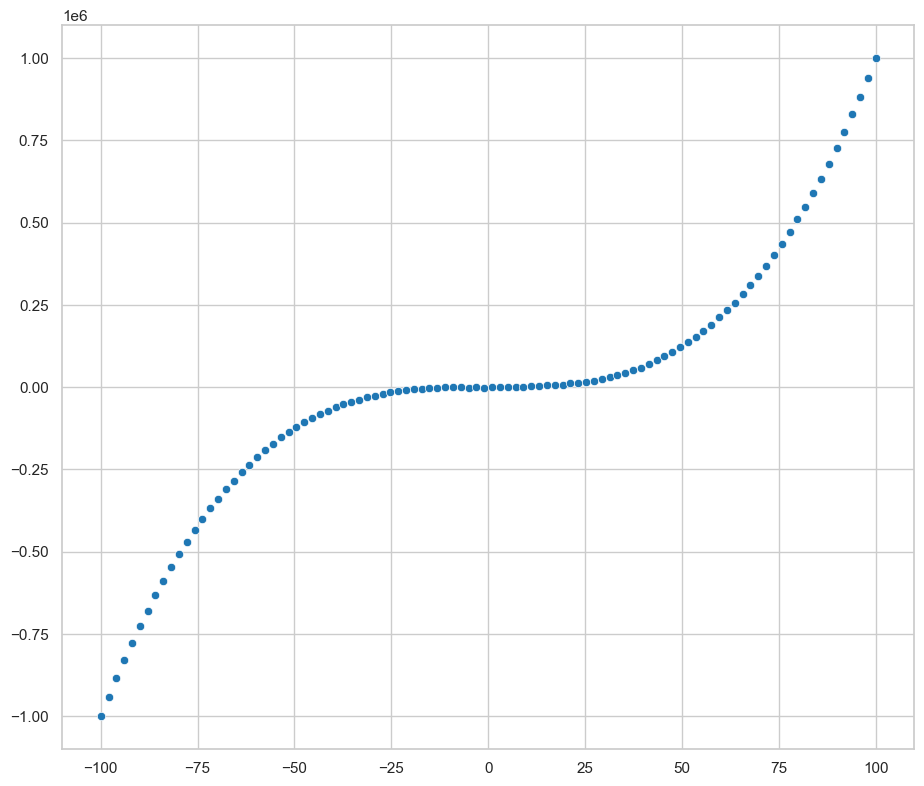

In [46]:
x = np.linspace(-100, 100, 100)
y = x**3
y += np.random.normal(0, 1000, x.size)
sns.scatterplot(
    x=x, y=y
)

np.corrcoef(x,y)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

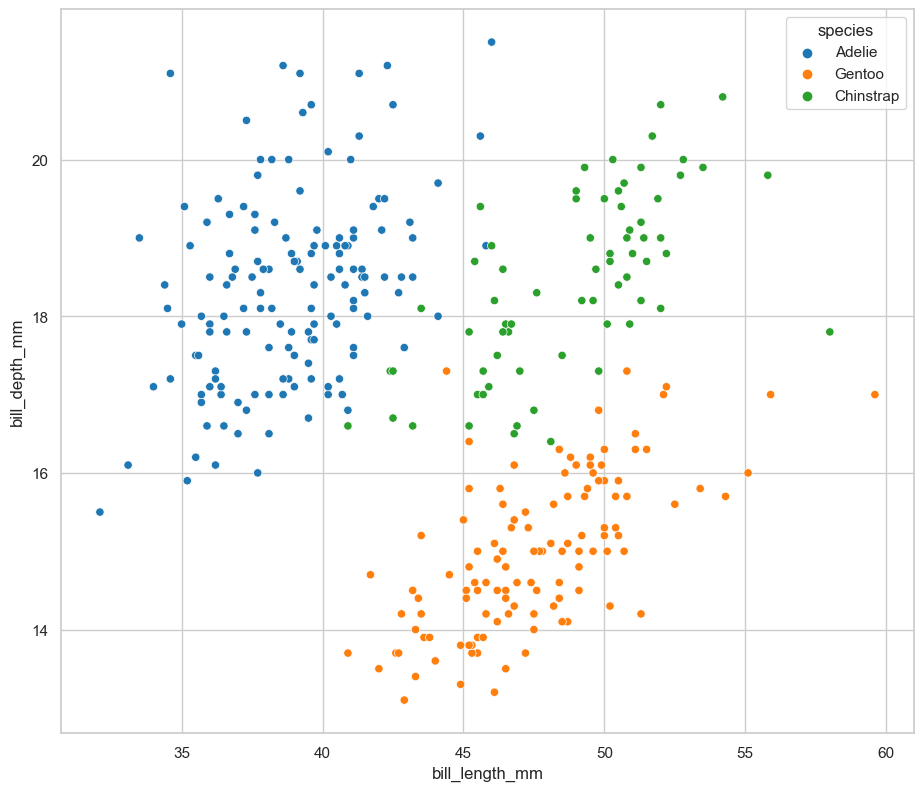

In [47]:
sns.scatterplot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue='species'
)

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


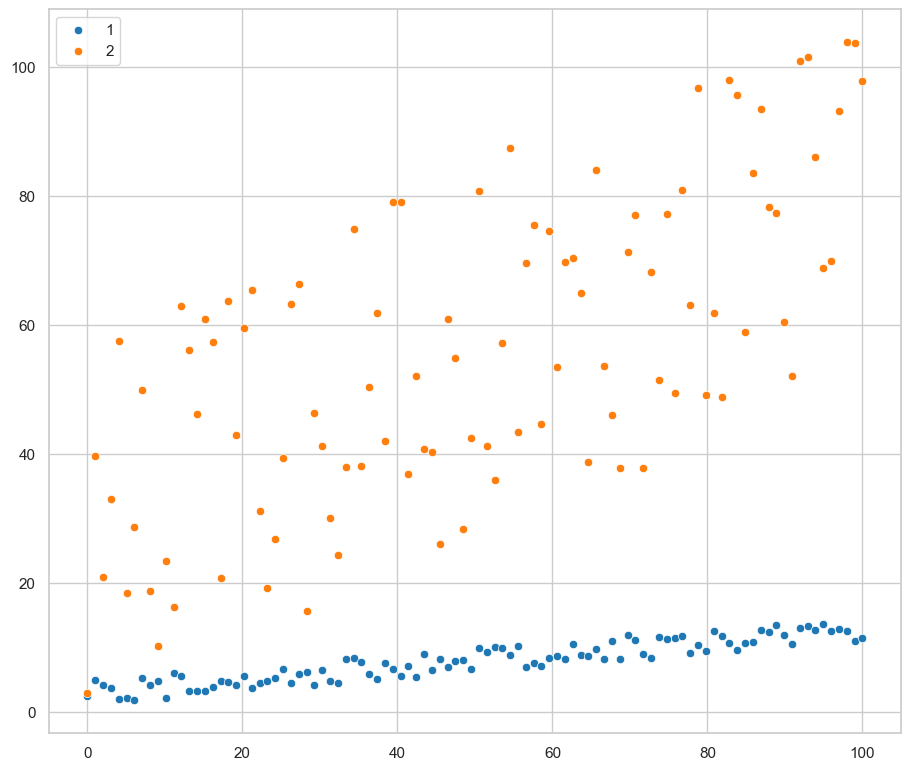

In [48]:
np.random.seed(42)
x_1 = np.linspace(0,100,100)
y_1 = 0.1* x_1 +3 + np.random.uniform(-2,2,size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)


x_2 = np.linspace(0,100,100)
y_2= 0.5 * x_2 +1+ np.random.uniform(0,60,size=x_2.size)


sns.scatterplot(
    x=x_2,
    y=y_2
)


plt.legend(labels=['1','2'])

print(np.corrcoef(x_1,y_1))
print(np.corrcoef(x_2,y_2))

## Estableciendo realciones: analisis de regresion simple

In [49]:
res_1 = scipy.stats.linregress(x=x_1, y=y_1)
res_2 = scipy.stats.linregress(x=x_2, y=y_2)


print(res_1, res_2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


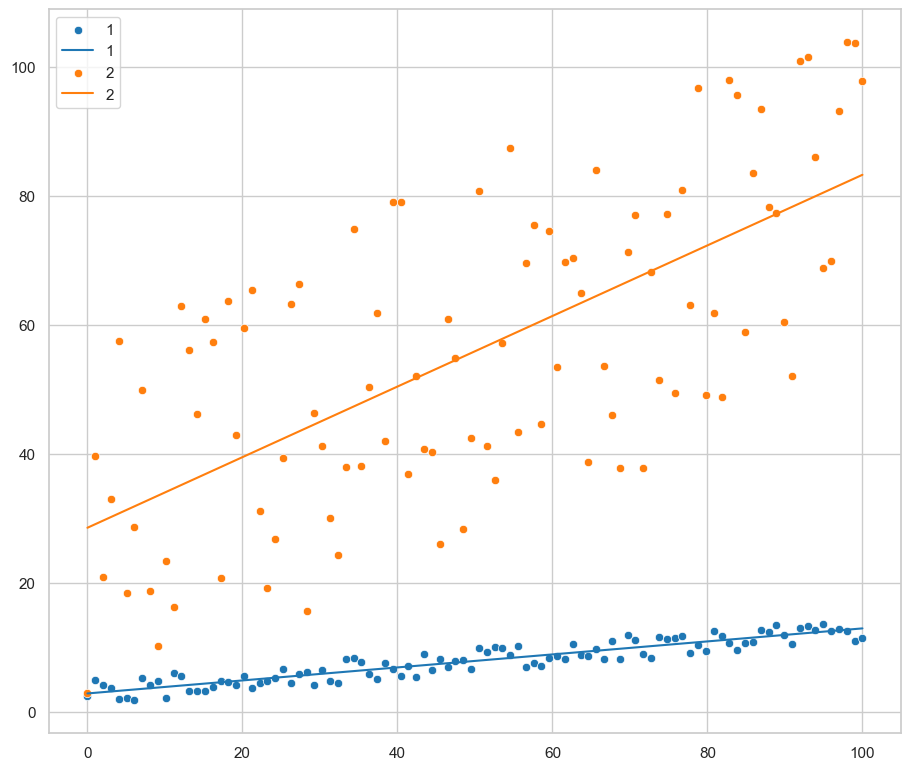

In [50]:
sns.scatterplot(x=x_1, y=y_1)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 = res_1.intercept + res_1.slope * fx_1

plt.plot(fx_1, fy_1)


sns.scatterplot(x=x_2, y=y_2)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 =res_2.intercept +res_2.slope * fx_2

plt.plot(fx_2, fy_2)

plt.legend(["1", "1","2","2"])

LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


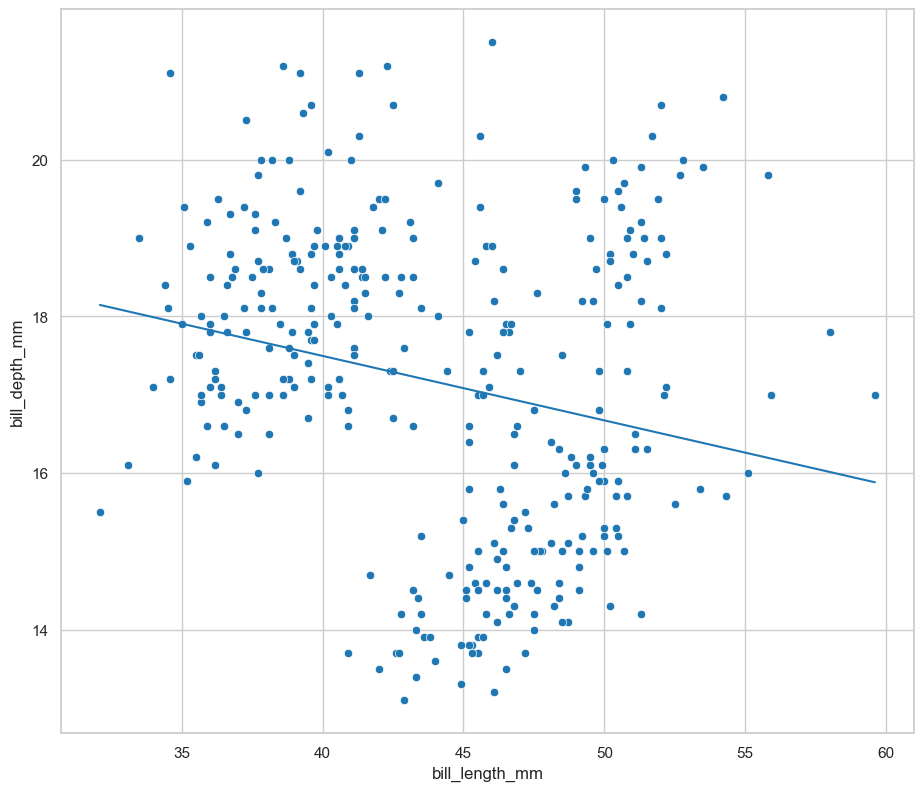

In [51]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins = scipy.stats.linregress(
    x=processed_penguins_df.bill_length_mm,
    y=processed_penguins_df.bill_depth_mm
)

print(res_penguins)


fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 = res_penguins.intercept+ res_penguins.slope*fx_1

plt.plot(fx_1,fy_1)

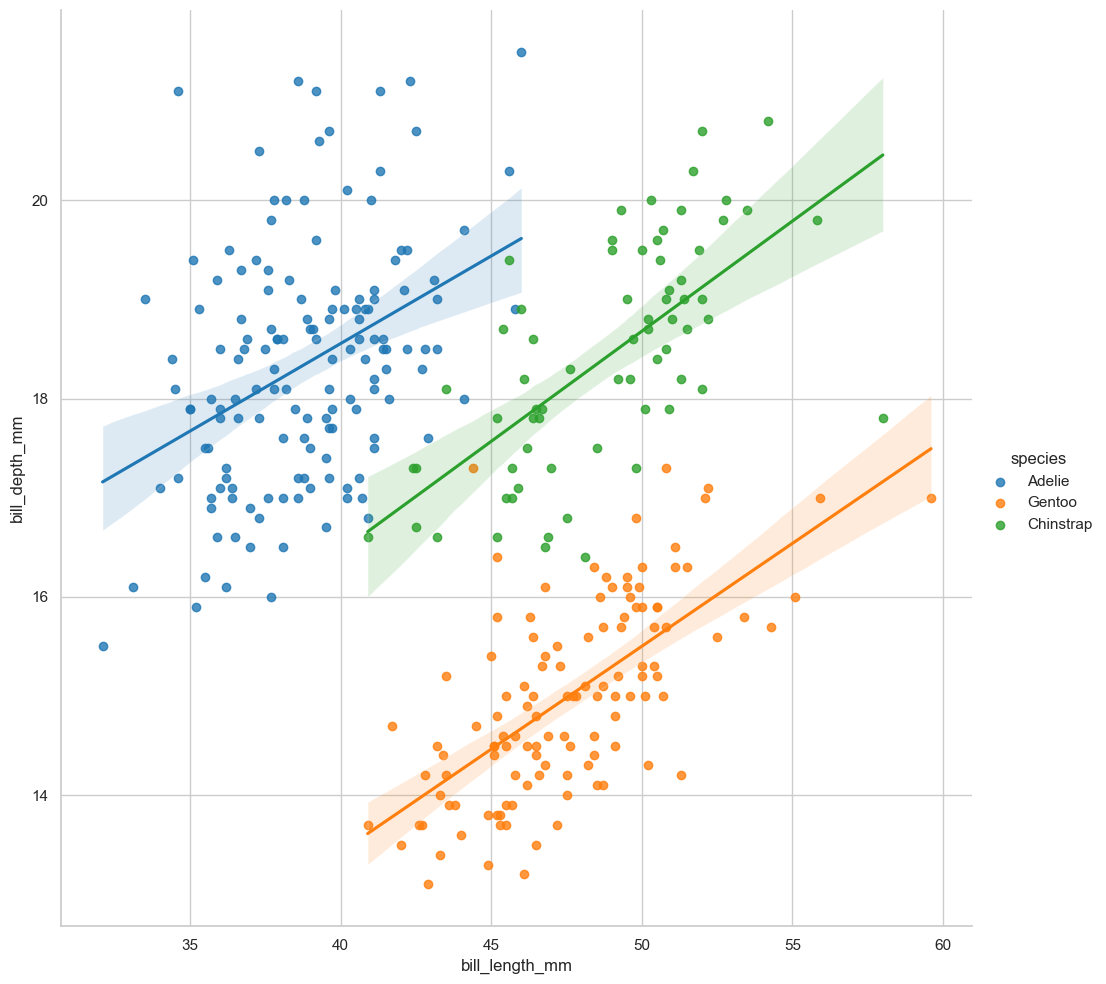

In [52]:
sns.lmplot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y=  'bill_depth_mm',
    hue='species',
    height=10
)

## Limitaciones del analisis de regresion simple:

La regresion lineal simple no es simetrica

In [53]:
x = processed_penguins_df.bill_length_mm
y= processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x = x , y = y)
res_y_x = scipy.stats.linregress(x = y , y = x)

print(res_x_y, res_y_x, sep='\n')



LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195025, intercept=54.89085424504756, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


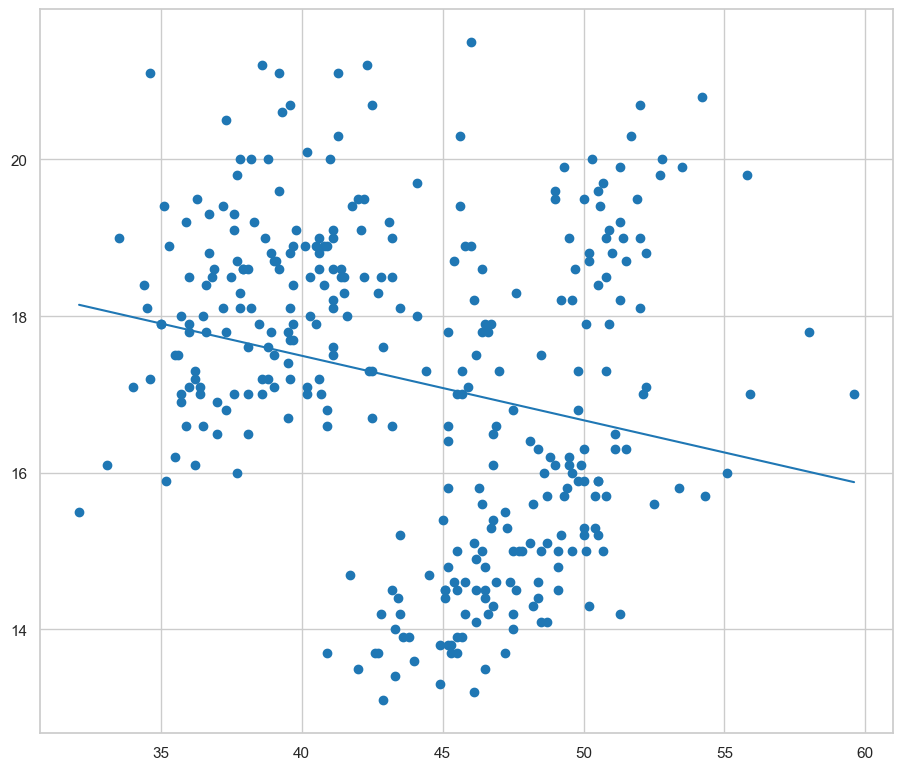

In [54]:
plt.scatter(x,y) 

fx_1 = np.array([x.min(),x.max()])
fy_1 = res_x_y.intercept + res_x_y.slope*fx_1


plt.plot(fx_1,fy_1)


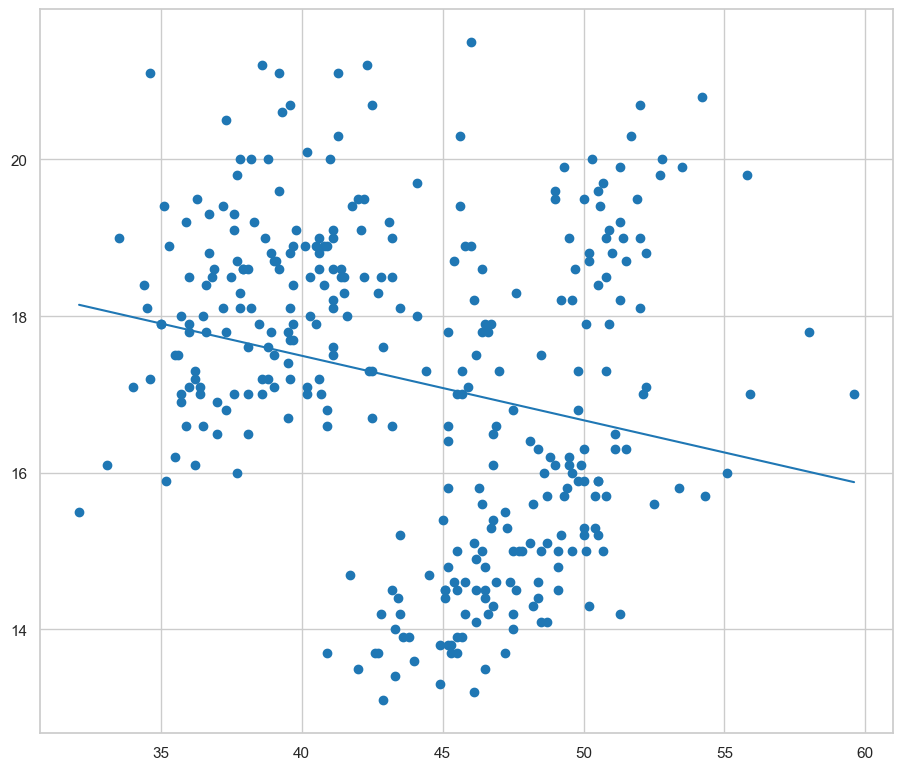

In [55]:
plt.scatter(x,y) 

fx_1 = np.array([x.min(),x.max()])
fy_1 = res_x_y.intercept + res_x_y.slope*fx_1


plt.plot(fx_1,fy_1)


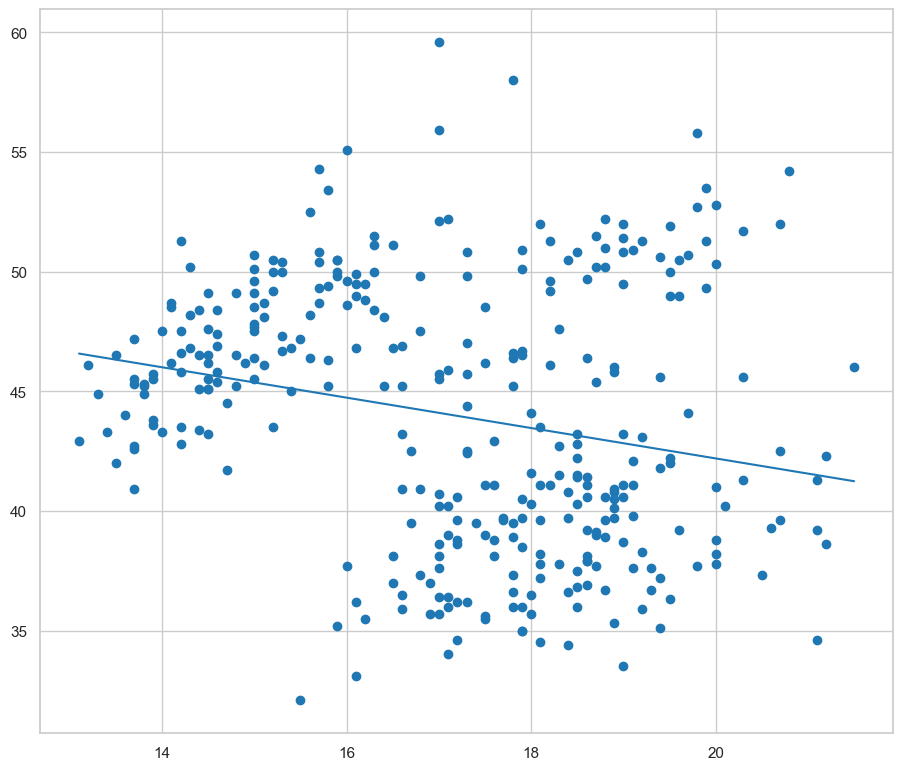

In [56]:
plt.scatter(y,x) 

fx_2 = np.array([y.min(),y.max()])
fy_2 = res_y_x.intercept + res_y_x.slope*fx_2


plt.plot(fx_2,fy_2)




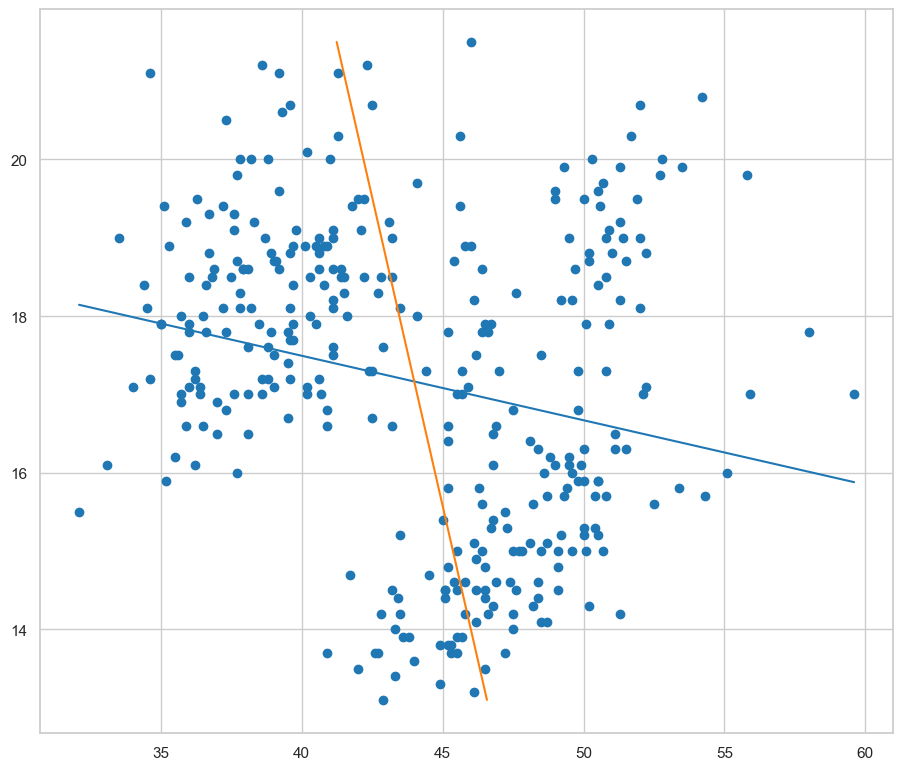

In [57]:
plt.scatter(x,y)

plt.plot(fx_1,fy_1)
plt.plot(fy_2,fx_2)




La regresion no nos dice nada sobre la causalidad, pero existen herramientas para serpara las relaciones entre multiples variables

In [58]:
(
    smf.ols(
      formula= 'bill_length_mm ~ bill_depth_mm',
      data=processed_penguins_df
    ).fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [59]:
(
    smf.ols(
      formula= 'bill_depth_mm ~ bill_length_mm',
      data=processed_penguins_df
    ).fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

# Analisis de regresion multiple

### Creacion de modelos


In [60]:
model_1 = (
    smf.ols(
      formula='body_mass_g ~ bill_length_mm',
      data = processed_penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           1.54e-32
Time:                        13:48:14   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
model_2 = (
    smf.ols(
      formula='body_mass_g ~ bill_length_mm + bill_depth_mm ',
      data = processed_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           7.04e-46
Time:                        13:48:14   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model_3 = (
    smf.ols(
      formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
      data = processed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Tue, 24 Jan 2023   Prob (F-statistic):          9.26e-103
Time:                        13:48:14   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
model_4 = (
    smf.ols(
      formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
      data = processed_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Tue, 24 Jan 2023   Prob (F-statistic):          6.28e-122
Time:                        13:48:14   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
model_5 = (
    smf.ols(
      formula='body_mass_g ~ flipper_length_mm',
      data = processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Tue, 24 Jan 2023   Prob (F-statistic):          3.13e-105
Time:                        13:48:14   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualizacion de resultados

In [65]:
# Creacion de tablas

models_results = pd.DataFrame(
    dict(
      actual_value = processed_penguins_df.body_mass_g,
      prediction_model_1 = model_1.predict(),
      prediction_model_2 = model_2.predict(),
      prediction_model_3 = model_3.predict(),
      prediction_model_4 = model_4.predict(),
      prediction_model_5 = model_5.predict(),
      species = processed_penguins_df.species,
      sex = processed_penguins_df.sex
    )
)

models_results

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3205.648453,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3456.414782,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3907.794176,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3807.487644,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3657.027846,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4509.633367,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,4258.867037,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,3807.487644,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4660.093165,Chinstrap,male


<AxesSubplot: ylabel='Proportion'>

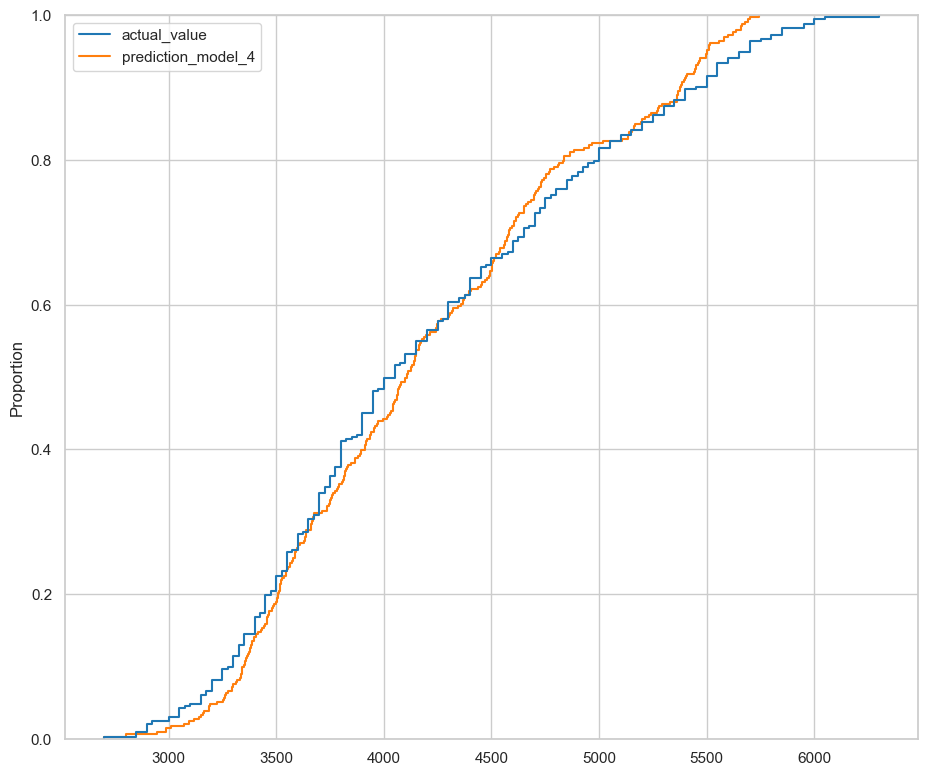

In [66]:
# ECDF's

sns.ecdfplot(
    data = models_results.select_columns(['actual_value', 'prediction_model_4'])
)

<AxesSubplot: ylabel='Density'>

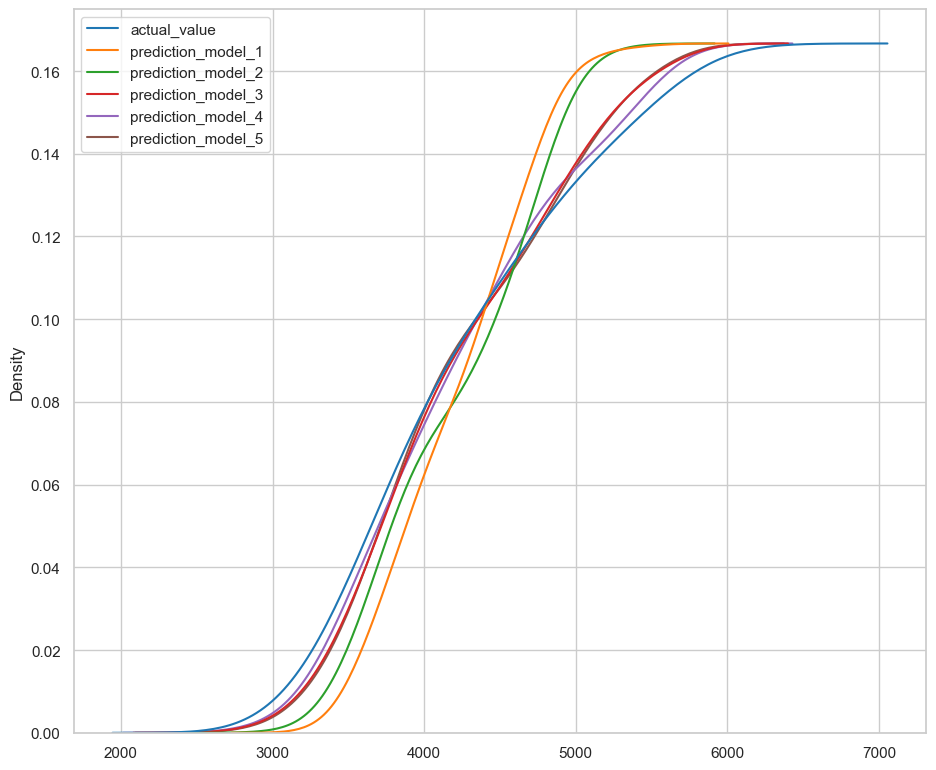

In [67]:
# PDF's

sns.kdeplot(
    data = models_results,
    cumulative =True
)

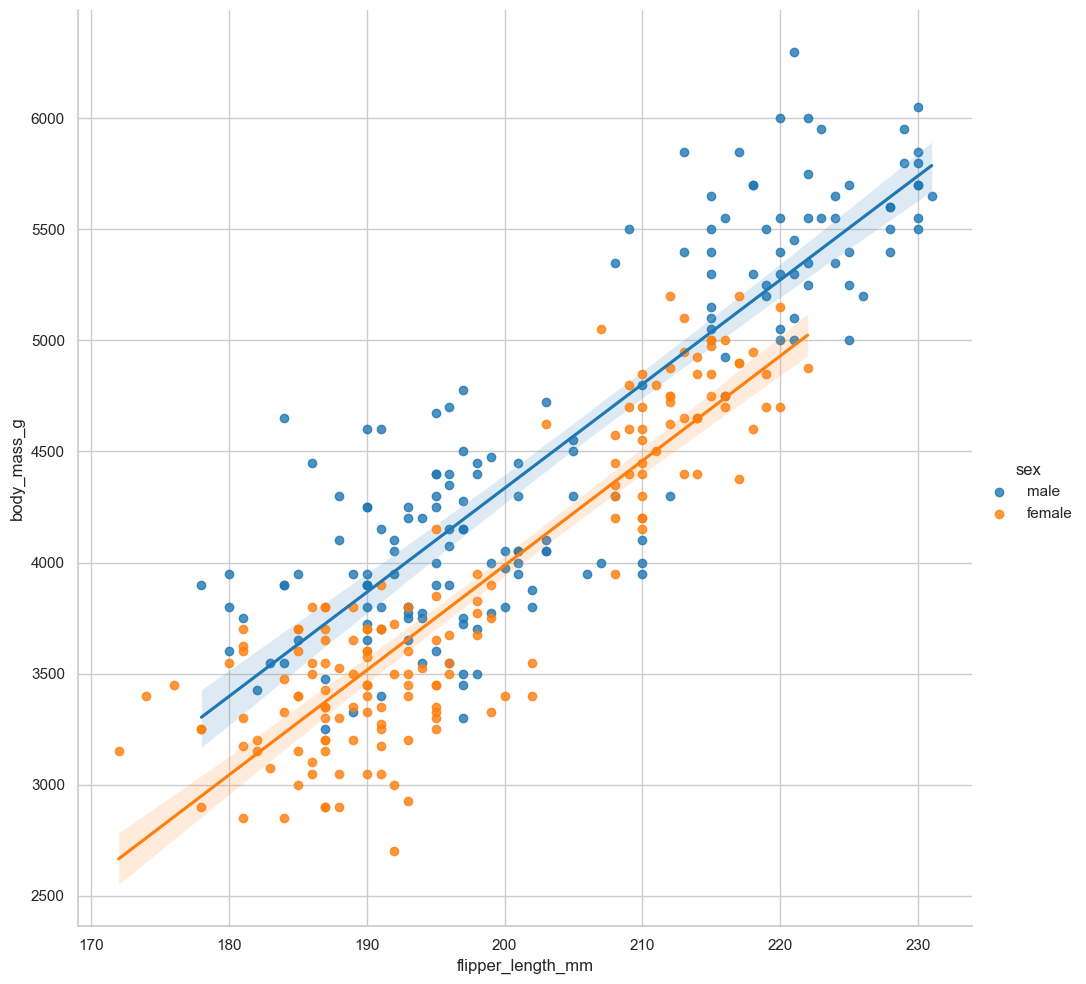

In [68]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue = 'sex',
    height=10
)

# Analisis de regresion logistica

In [69]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data =processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.4793
Time:                        13:48:15   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [70]:
## Exploración de nuestras variables categóricas

In [71]:
(
    processed_penguins_df
    .value_counts(['island', 'sex'])
    .reset_index(name='count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


In [72]:
processed_penguins_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [73]:
processed_penguins_df = (
    processed_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'],[1, 0, 0]))
)

In [74]:
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data = processed_penguins_df
).fit()



model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [75]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
      actual_adelie = processed_penguins_df.is_adelie,
      predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


In [76]:
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie','predicted_values'])
    .reset_index(name='count')
)

,actual_adelie,predicted_values,count
0,0,0.0,151
1,1,1.0,129
2,0,1.0,36
3,1,0.0,17


In [77]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409

### Paradoja de simpson

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

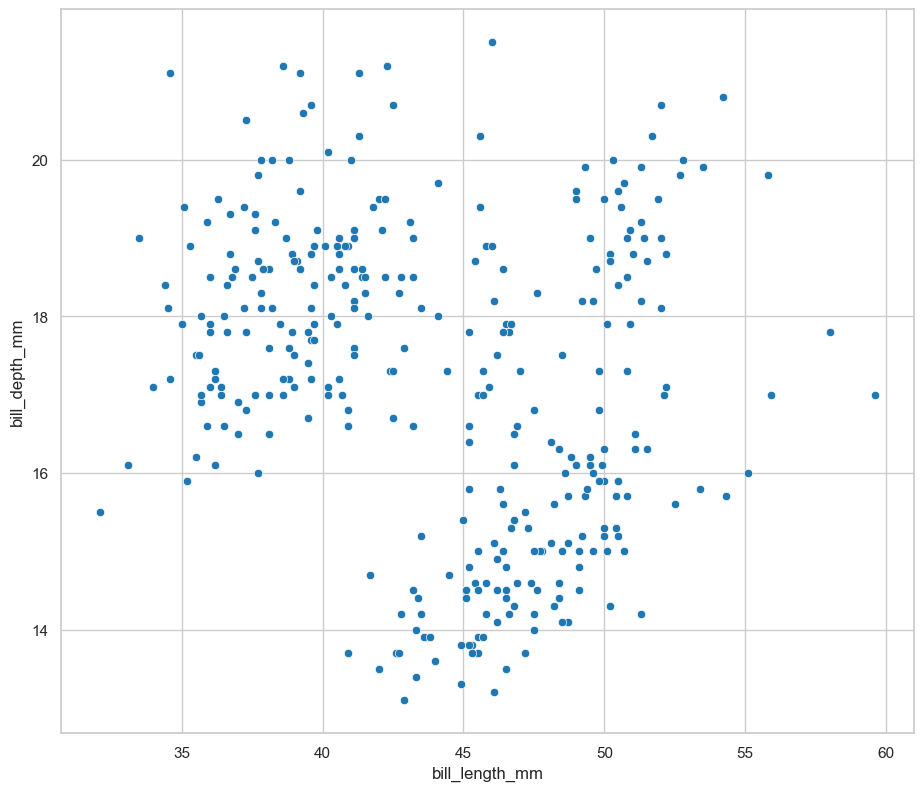

In [78]:
sns.scatterplot(
    data= processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

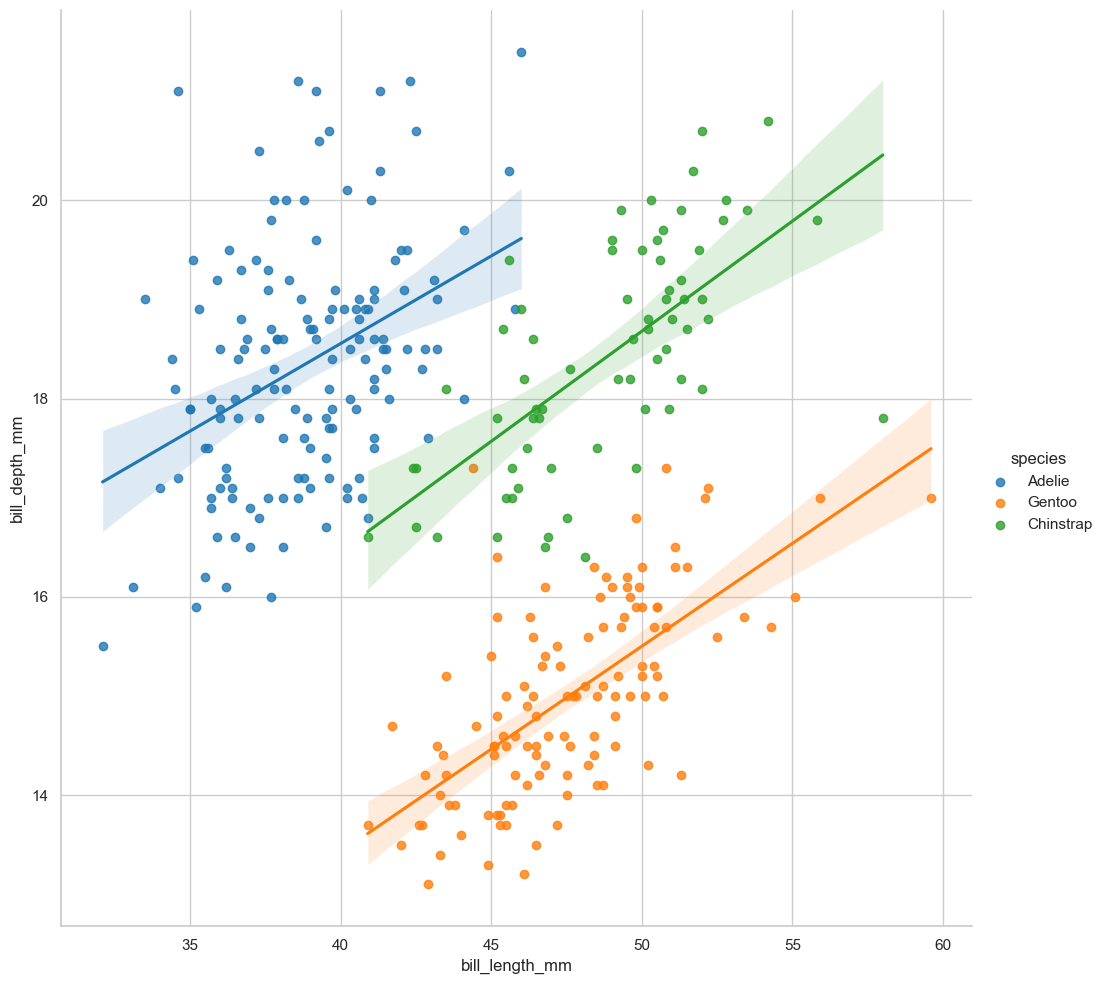

In [79]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10
)

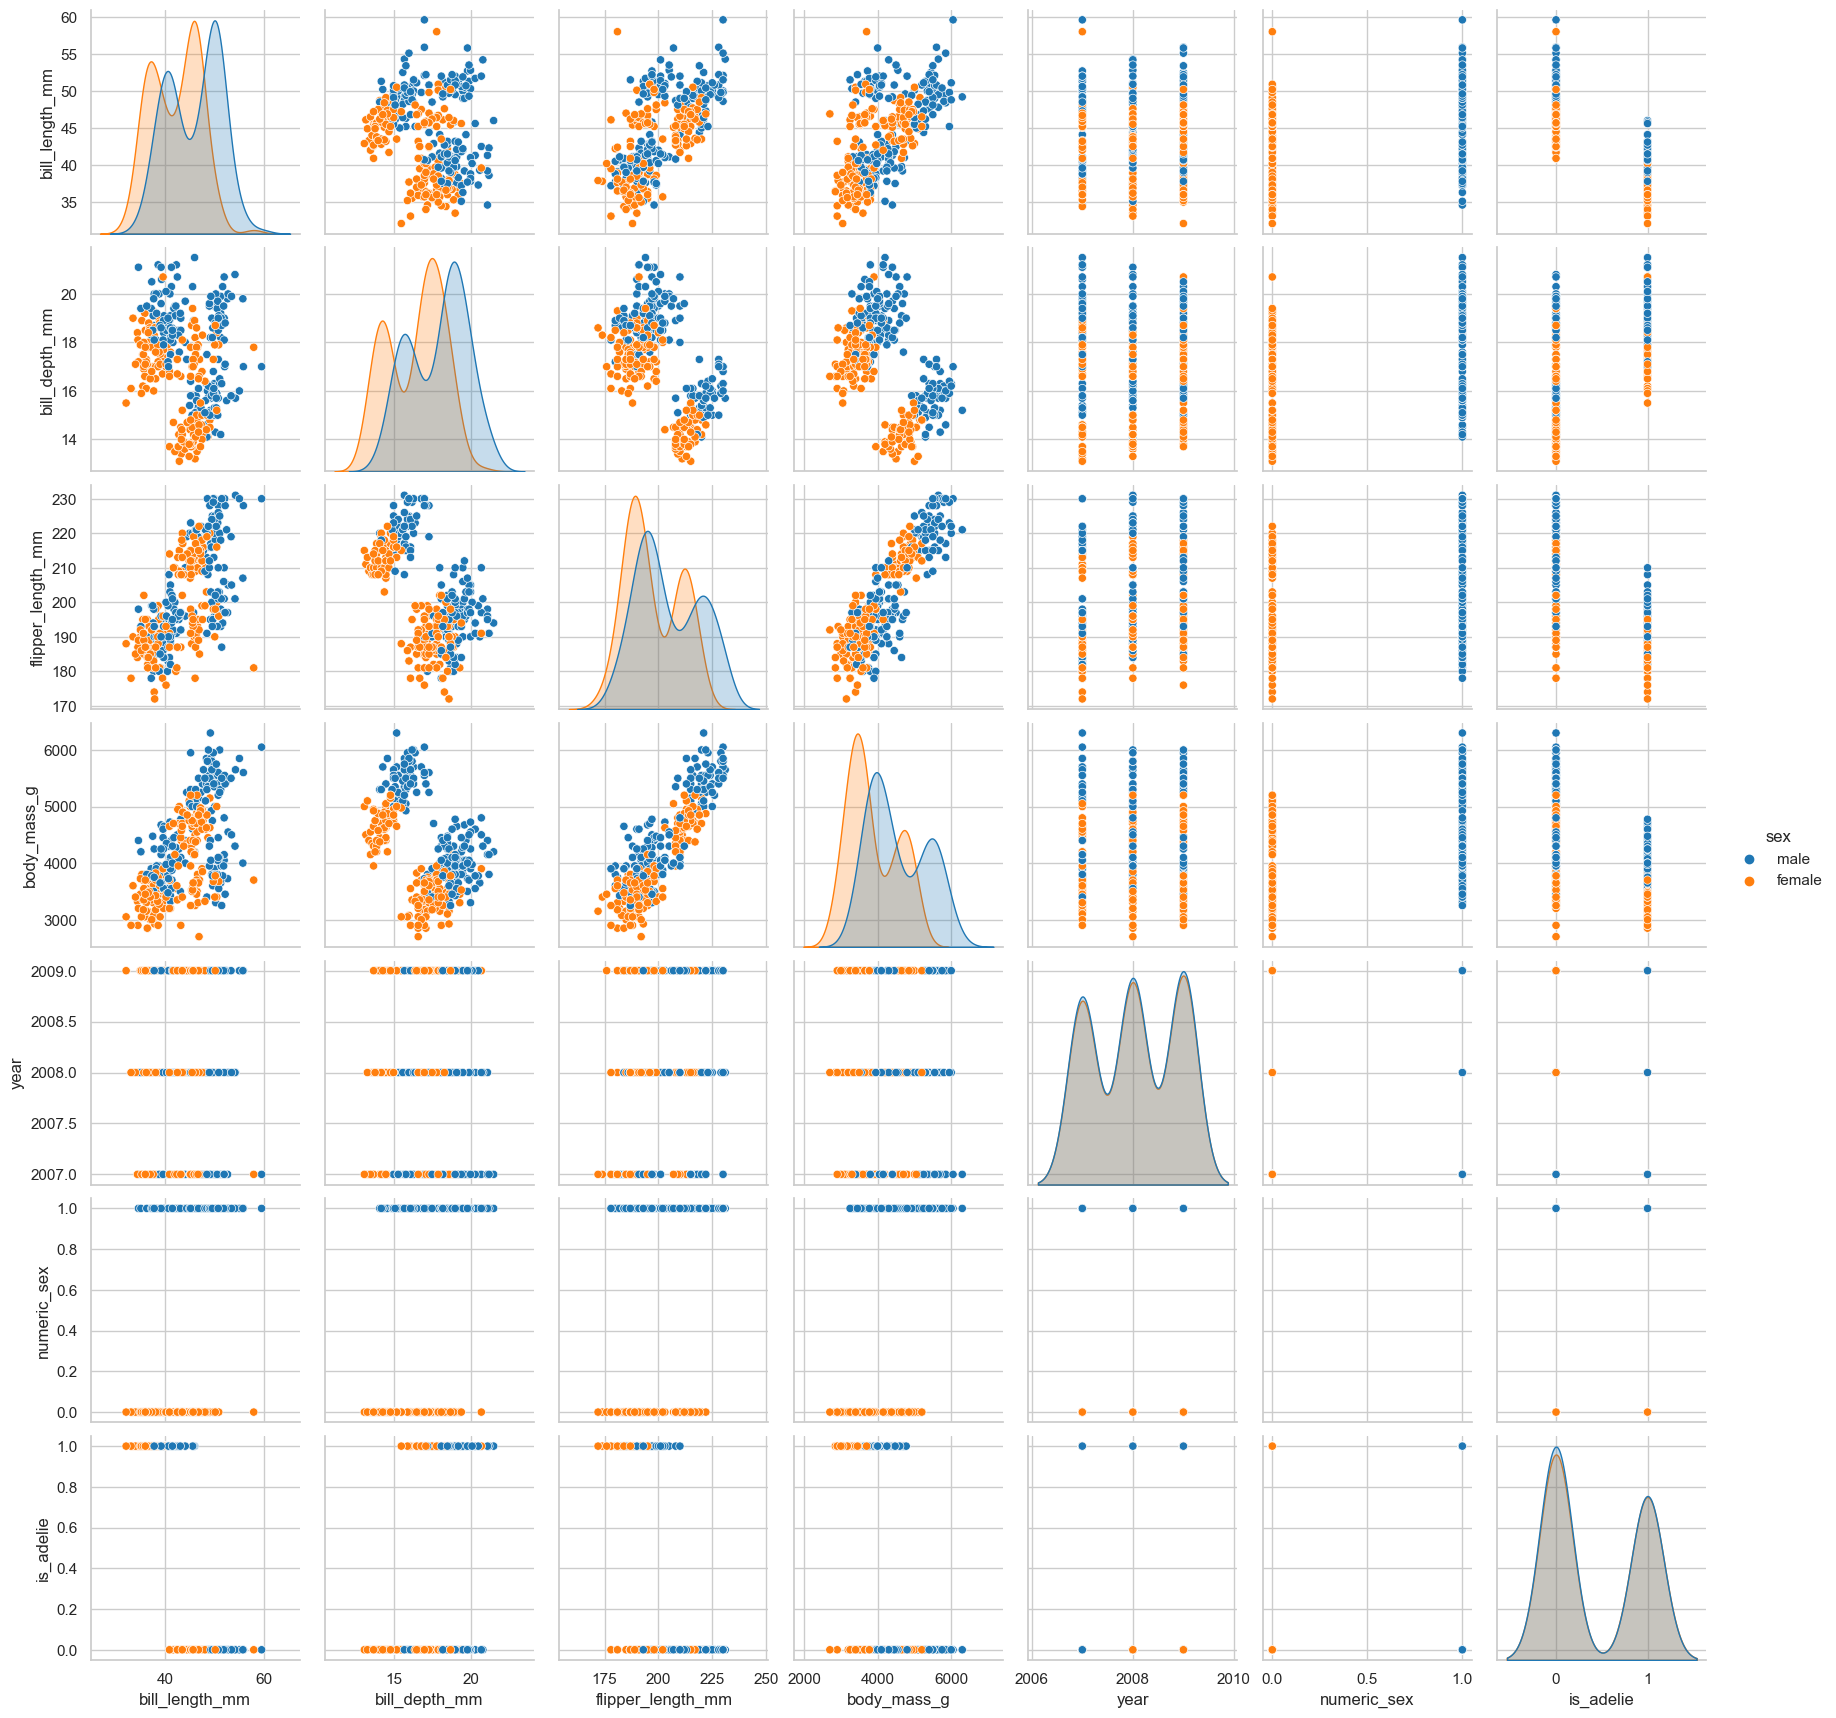

In [80]:
sns.pairplot(
    data=processed_penguins_df,
    hue='sex'
)

In [82]:
processed_penguins_df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
numeric_sex          0
is_adelie            0
dtype: int64